In [1]:
import pandas as pd
import os


class FileImporter:
    def __init__(self, directory):
        self.directory = directory
        self.list_of_files = sorted(filter(lambda x: os.path.isfile(
            os.path.join(self.directory, x)), os.listdir(self.directory)))
        self.dataframe = pd.DataFrame()

    def get_iteration(self, filename):
        last_digit = int(filename.split('.')[0][-1])
        if last_digit != 0:
            return last_digit
        return 10

    def get_data(self):
        for filename in self.list_of_files:
            lines = []
            with open(f'{self.directory}/{filename}') as f:
                lines = f.readlines()

            class_id = int(lines[1].split('=')[1])
            user_id = int(lines[2].split('=')[1])
            iteration = self.get_iteration(filename)

            df = pd.read_csv(f'{self.directory}/{filename}', header=3)
            df['user'] = user_id
            df['label'] = class_id
            df['iteration'] = iteration

            self.dataframe = pd.concat([self.dataframe, df])

        self.dataframe.sort_values(
            ['user', 'label', 'iteration'], inplace=True)

        return self.dataframe


In [2]:
import numpy as np


class Computation:
    def dtw_cost(self, series1, series2):
        n, m = len(series1), len(series2)
        dtw_matrix = np.zeros((n+1, m+1))
        for i in range(n+1):
            for j in range(m+1):
                dtw_matrix[i, j] = np.inf
        dtw_matrix[0, 0] = 0

        for i in range(1, n+1):
            for j in range(1, m+1):
                cost = abs(series1[i-1] - series2[j-1])
                # take last min from a square box
                last_min = np.min(
                    [dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
                dtw_matrix[i, j] = cost + last_min
        return dtw_matrix[-1][-1]

    def multivariate_dtw(self, df1, df2):
        dtw_x = self.dtw_cost(df1['<x>'], df2['<x>'])
        dtw_y = self.dtw_cost(df1['<y>'], df2['<y>'])
        dtw_z = self.dtw_cost(df1['<z>'], df2['<z>'])

        return dtw_x + dtw_y + dtw_z


In [7]:
importer = FileImporter('../Sketch-Data-master/SketchData/Domain01')
computation = Computation()

data = importer.get_data()
data_1_1_1 = data.query('user == 1 and label == 1 and iteration == 1')
data_1_2_1 = data.query('user == 2 and label == 2 and iteration == 1')
data_1_3_1 = data.query('user == 1 and label == 3 and iteration == 1')

In [4]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt


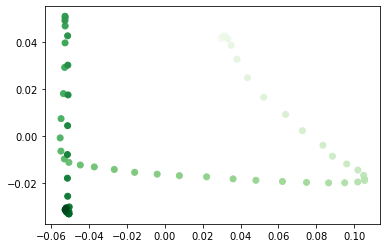

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca_data = pca.fit_transform(data_1_2_1[['<x>', '<y>', '<z>']])
pca_project = pca_data[:,0:2]
fig = plt.figure()
ax = plt.axes()
ax.scatter(pca_project[:,0],pca_project[:,1], c=data_1_2_1['<t>'], cmap='Greens')


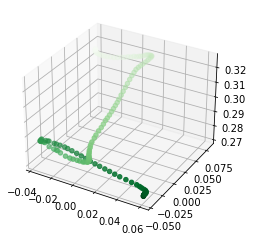

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_1_2_1['<x>'], data_1_2_1['<y>'], data_1_2_1['<z>'], c=data_1_2_1['<t>'], cmap='Greens');

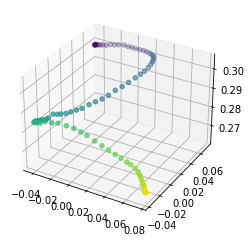

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_1_3_1['<x>'], data_1_3_1['<y>'], data_1_3_1['<z>'], c=data_1_3_1['<t>']);

In [15]:
new_list = [(2,6,9),(0,9,7),(1,7,6),(1,1,2)]

b = sorted(new_list)
print(b)

[(0, 9, 7), (1, 1, 2), (1, 7, 6), (2, 6, 9)]


In [16]:
def most_frequent(List):
    return max(set(List), key = List.count)
 
List = [2, 1, 2, 2, 1, 3]
print(most_frequent(labels))

2


In [19]:
distances = [(52.29494500000001, 1), (45.57753899999997, 1), (49.31007899999999, 1), (43.18521099999998, 1), (45.17304200000001, 1), (43.888130999999994, 1), (42.607262000000006, 1), (42.845059000000006, 1), (40.329438999999994, 1), (41.194502, 1), (45.87161900000001, 2), (46.89597199999997, 2), (50.02402400000001, 2), (49.922086, 2), (54.68910700000002, 2), (53.586365, 2), (54.864368999999996, 2), (54.778806, 2), (56.49120599999999, 2), (56.104007999999986, 2), (43.77494899999999, 3), (47.43080500000003, 3), (47.342234999999995, 3), (47.901872000000004, 3), (48.73342899999998, 3), (48.968436, 3), (48.81645199999999, 3), (49.14542499999996, 3), (49.72093499999999, 3), (49.20278699999997, 3), (52.25195899999998, 4), (53.55160999999999, 4), (56.766906000000034, 4), (59.76949599999996, 4), (52.955879999999986, 4), (52.957938, 4), (56.611458, 4), (54.665482, 4), (51.73992200000001, 4), (54.70723399999999, 4), (45.57895900000001, 5), (47.27962900000001, 5), (47.27074699999999, 5), (49.27579899999998, 5), (46.78333700000001, 5), (49.267815999999996, 5), (51.291814, 5), (47.50470599999999, 5), (43.45319099999998, 5), (42.88635600000002, 5), (36.657602000000004, 6), (38.948519, 6), (39.92605, 6), (40.04486299999999, 6), (43.65183300000001, 6), (47.55602399999999, 6), (49.223050000000015, 6), (42.27745600000001, 6), (48.25293500000001, 6), (45.43264399999999, 6), (38.16741999999998, 7), (38.776731000000005, 7), (40.550768999999995, 7), (39.39378899999999, 7), (40.62721900000001, 7), (41.93047500000002, 7), (42.166615999999976, 7), (39.302927, 7), (47.24804700000001, 7), (43.173069000000005, 7), (41.229933999999986, 8), (39.711212, 8), (42.346136999999985, 8), (42.125598000000004, 8), (42.78568699999998, 8), (43.74293199999999, 8), (18.18170900000001, 8), (24.627499999999998, 8), (26.052439999999997, 8), (28.103233999999986, 8), (18.719182999999994, 9), (19.112579999999998, 9), (18.770601000000003, 9), (21.157696, 9), (22.912642000000005, 9), (23.320942000000006, 9), (23.110948999999984, 9), (24.922518000000004, 9), (24.21544800000001, 9), (25.562941999999996, 9), (36.36781800000001, 10), (35.035839000000024, 10), (34.550068999999986, 10), (35.139004, 10), (34.900896, 10), (35.95930099999999, 10), (36.918921000000005, 10), (36.67402700000001, 10), (37.863788, 10), (35.822333000000015, 10), (40.36058800000001, 1), (39.05673500000001, 1), (40.78723700000002, 1), (41.712126, 1), (41.668782, 1), (43.324959000000014, 1), (46.444659999999985, 1), (42.38023, 1), (41.57587100000001, 1), (41.99635199999999, 1), (39.960996, 2), (41.035414999999986, 2), (44.778953, 2), (44.852619999999995, 2), (46.27254099999998, 2), (49.89842299999998, 2), (41.73024500000001, 2), (41.471757999999994, 2), (43.26477199999998, 2), (43.091539, 2), (40.52709699999999, 3), (39.743501, 3), (41.946512999999996, 3), (42.827929, 3), (44.070063999999974, 3), (44.14432600000001, 3), (42.48754100000001, 3), (38.986805000000025, 3), (43.13378500000001, 3), (43.28808000000001, 3), (44.24298799999998, 4), (45.49157600000001, 4), (38.29724899999999, 4), (43.251613000000006, 4), (47.907265, 4), (43.814695999999984, 4), (47.61746300000002, 4), (48.30003800000001, 4), (50.96662099999999, 4), (50.59895, 4), (42.736659, 5), (49.416589999999985, 5), (48.497668000000004, 5), (49.359196, 5), (44.64918699999998, 5), (49.80298599999999, 5), (47.736180000000004, 5), (47.11790500000001, 5), (46.862831000000014, 5), (46.38281000000003, 5), (48.64800000000001, 6), (51.994457000000004, 6), (49.83724299999999, 6), (50.47145800000002, 6), (47.27814799999999, 6), (49.546024999999986, 6), (48.51442699999998, 6), (48.62263500000002, 6), (46.29580000000002, 6), (44.70509799999999, 6), (45.02279800000001, 7), (39.089850000000006, 7), (42.388472, 7), (44.539947, 7), (45.81840699999999, 7), (46.86365000000002, 7), (46.761264999999995, 7), (46.25374200000001, 7), (45.17131900000001, 7), (46.279201999999984, 7), (32.94174199999999, 8), (28.559800000000017, 8), (32.930413, 8), (37.96904899999999, 8), (39.35432800000002, 8), (37.239284, 8), (41.767061, 8), (39.571249, 8), (44.09704900000003, 8), (45.80409800000002, 8), (37.483974, 9), (38.572663000000006, 9), (41.98132600000001, 9), (43.08431599999999, 9), (45.682218, 9), (46.20498499999999, 9), (44.644912999999995, 9), (42.85501500000001, 9), (39.77414700000001, 9), (40.588138, 9), (38.76253799999997, 10), (37.710436999999985, 10), (39.44995799999998, 10), (41.01581700000001, 10), (37.666835999999996, 10), (35.20017899999999, 10), (37.601789999999994, 10), (37.63709899999999, 10), (39.19560000000001, 10), (39.04763499999999, 10), (53.831883000000005, 1), (51.367620999999986, 1), (52.26092000000001, 1), (49.628466999999986, 1), (50.51481500000002, 1), (48.433437999999995, 1), (46.646187, 1), (46.60072300000001, 1), (47.69722499999998, 1), (48.59279500000001, 1), (63.238235, 2), (42.525453, 2), (48.84677000000001, 2), (46.175129999999996, 2), (49.588066, 2), (41.82812799999999, 2), (45.69649900000002, 2), (46.131138000000014, 2), (45.30166700000001, 2), (46.61756200000001, 2), (46.15637999999998, 3), (47.419408000000004, 3), (48.14233800000001, 3), (48.64034899999998, 3), (47.9795, 3), (46.918408, 3), (48.47157599999998, 3), (47.841460999999995, 3), (49.231303000000004, 3), (46.600235000000005, 3), (51.463801, 4), (48.895019, 4), (49.239959999999996, 4), (49.727303, 4), (47.051436999999986, 4), (54.721137999999996, 4), (51.115148, 4), (52.20528000000001, 4), (47.13949799999998, 4), (51.40004900000001, 4), (44.772680000000015, 5), (45.476928000000015, 5), (45.389292, 5), (45.67235700000001, 5), (45.710237, 5), (48.670148, 5), (42.802443000000004, 5), (45.95811200000001, 5), (46.491127000000006, 5), (43.524830999999985, 5), (44.71892199999999, 6), (43.62003899999999, 6), (43.600801000000004, 6), (48.71002499999998, 6), (46.072623, 6), (43.029122, 6), (42.29484500000001, 6), (48.84174700000001, 6), (45.243593999999995, 6), (46.82149299999998, 6), (34.99313299999999, 7), (33.75450799999999, 7), (33.988800000000005, 7), (34.201449, 7), (37.235010999999986, 7), (43.06702399999999, 7), (38.907644000000005, 7), (38.66751799999998, 7), (39.87738500000001, 7), (40.31605499999999, 7), (46.14689800000001, 8), (43.52428899999999, 8), (42.04978799999999, 8), (40.266705000000016, 8), (41.836583000000005, 8), (41.14179899999999, 8), (44.981866, 8), (41.263271999999986, 8), (43.39122500000002, 8), (39.74319199999999, 8), (41.518362999999994, 9), (43.306165, 9), (46.628999000000015, 9), (39.790015, 9), (39.96048999999999, 9), (40.984266000000005, 9), (41.73764099999998, 9), (34.450190000000006, 9), (36.256244, 9), (34.341311, 9), (42.29006399999998, 10), (38.906611999999996, 10), (40.90849599999999, 10), (39.73356399999999, 10), (37.98688299999998, 10), (39.27443699999998, 10), (38.484117, 10), (38.20853399999999, 10), (38.609871, 10), (40.191610000000004, 10), (37.685563000000016, 1), (35.99860100000001, 1), (33.95224399999999, 1), (30.840616999999995, 1), (33.601974999999996, 1), (32.22714100000001, 1), (31.992379999999997, 1), (32.76909199999999, 1), (32.11436400000001, 1), (33.04148500000001, 1), (42.313743999999986, 2), (40.249134999999995, 2), (37.76030499999999, 2), (38.849487999999994, 2), (38.308419, 2), (36.99631699999999, 2), (38.335322, 2), (36.57068199999999, 2), (36.711343, 2), (37.67441700000003, 2), (25.661991999999998, 3), (29.64735600000001, 3), (30.062445999999994, 3), (29.74147100000002, 3), (29.33754699999999, 3), (29.915768000000007, 3), (30.136849999999992, 3), (31.003907000000005, 3), (31.431268999999993, 3), (28.684594999999995, 3), (37.29195100000001, 4), (37.004942, 4), (37.874874999999996, 4), (39.494776999999985, 4), (39.64453300000001, 4), (37.496065000000016, 4), (41.53091900000001, 4), (38.196582, 4), (37.07092600000001, 4), (37.83463600000001, 4), (31.408552000000007, 5), (33.64058399999999, 5), (33.11938499999998, 5), (31.894062, 5), (30.581553999999997, 5), (31.236832000000014, 5), (31.67045500000001, 5), (32.61386500000002, 5), (32.092177, 5), (30.928979999999985, 5), (27.530314000000004, 6), (34.00439599999999, 6), (32.780591999999984, 6), (36.181861, 6), (35.598065999999996, 6), (36.465534999999996, 6), (36.98123699999999, 6), (35.934251999999994, 6), (37.13270699999998, 6), (36.504177999999996, 6), (35.39404299999999, 7), (31.565608000000005, 7), (30.167037999999998, 7), (31.761591000000017, 7), (32.270813000000004, 7), (34.360706, 7), (32.474790999999996, 7), (34.100604999999995, 7), (37.027088000000006, 7), (32.491803000000004, 7), (29.505239000000003, 8), (30.452020999999988, 8), (30.684679999999993, 8), (33.27600699999999, 8), (33.228629999999995, 8), (32.260089000000015, 8), (32.37068299999999, 8), (33.549884999999996, 8), (32.652468000000006, 8), (34.60077799999999, 8), (30.272104000000002, 9), (29.359608, 9), (32.745868, 9), (32.038971000000004, 9), (34.45338100000001, 9), (32.90856399999999, 9), (34.14125699999998, 9), (33.145657000000014, 9), (32.991623000000004, 9), (34.366068999999996, 9), (32.596996000000004, 10), (33.791951000000005, 10), (36.076556999999994, 10), (35.851303, 10), (37.504847000000005, 10), (37.19831700000002, 10), (40.23359500000001, 10), (36.28770599999999, 10), (37.92430499999999, 10), (37.76549999999999, 10), (45.789293999999984, 1), (48.081169999999986, 1), (46.84913499999999, 1), (50.06664199999999, 1), (49.60213400000001, 1), (48.98570599999998, 1), (49.86020099999999, 1), (49.725862000000006, 1), (51.20849299999999, 1), (51.885268999999965, 1), (54.911642999999955, 2), (58.097323999999986, 2), (62.80006700000002, 2), (58.51929199999998, 2), (59.401913, 2), (60.336369999999974, 2), (60.51813300000002, 2), (59.45798400000001, 2), (60.484266000000005, 2), (69.39800799999998, 2), (43.95709200000002, 3), (46.977962999999995, 3), (51.318858000000006, 3), (54.435939000000005, 3), (55.91076099999997, 3), (58.04524300000001, 3), (58.745734000000034, 3), (58.12031400000001, 3), (55.887729000000014, 3), (59.47802799999998, 3), (63.47577000000002, 4), (59.67818699999999, 4), (56.82105900000001, 4), (58.557068999999984, 4), (59.44896900000003, 4), (57.133101999999994, 4), (58.99373199999998, 4), (59.63660599999999, 4), (59.82539700000002, 4), (60.869116, 4), (54.25616600000002, 5), (56.559374999999996, 5), (57.48323099999999, 5), (59.33023800000001, 5), (58.75473900000001, 5), (60.88538800000002, 5), (56.09433999999998, 5), (56.43481800000002, 5), (55.519900999999976, 5), (55.61408900000003, 5), (59.138914, 6), (60.465747999999984, 6), (60.364791999999966, 6), (61.78203399999998, 6), (61.42722599999999, 6), (59.39376500000001, 6), (59.033789, 6), (60.74919900000002, 6), (56.473749000000005, 6), (58.60034200000001, 6), (56.04666799999998, 7), (53.707652999999986, 7), (54.018233999999985, 7), (55.35490999999999, 7), (55.736823000000015, 7), (56.727425999999994, 7), (56.92167399999999, 7), (57.653700000000015, 7), (58.255573000000005, 7), (59.224907999999985, 7), (55.173574, 8), (52.81635300000001, 8), (53.12799099999997, 8), (50.76486400000002, 8), (50.12261100000002, 8), (51.615600000000015, 8), (52.981908000000004, 8), (52.233785999999995, 8), (51.327062000000026, 8), (52.76694699999999, 8), (47.60973099999999, 9), (46.73432699999999, 9), (47.95908, 9), (47.477722, 9), (49.04049799999999, 9), (48.43595200000001, 9), (47.109795999999996, 9), (46.142163000000025, 9), (47.87903299999998, 9), (45.47320400000002, 9), (48.77123999999998, 10), (50.97535900000001, 10), (51.98018499999998, 10), (53.64323399999999, 10), (54.14182500000001, 10), (53.378567000000004, 10), (53.511, 10), (52.301581000000006, 10), (53.205555, 10), (52.772028000000006, 10), (56.73034200000001, 1), (69.48943100000001, 1), (57.64532099999999, 1), (58.02067800000003, 1), (58.22676, 1), (57.422806999999985, 1), (57.75435800000002, 1), (58.531975999999986, 1), (59.260202, 1), (59.393212999999996, 1), (57.526644000000026, 2), (59.97389199999998, 2), (60.69852200000001, 2), (60.75309700000001, 2), (62.36397299999999, 2), (61.94785200000001, 2), (63.15797899999996, 2), (62.99853999999999, 2), (59.434418000000036, 2), (60.14010900000001, 2), (59.106324, 3), (59.56496799999999, 3), (56.87705800000002, 3), (59.867028000000005, 3), (58.82336100000001, 3), (57.099441, 3), (54.94257199999999, 3), (58.758662000000015, 3), (58.581761, 3), (57.93599600000002, 3), (48.03019400000001, 4), (50.086007000000016, 4), (53.25386, 4), (48.794039, 4), (52.273066000000014, 4), (52.61227500000002, 4), (53.47784400000005, 4), (53.558555999999996, 4), (51.79747400000001, 4), (53.41534099999999, 4), (43.767133, 5), (44.142195, 5), (43.24552100000001, 5), (44.69000499999997, 5), (46.551417000000015, 5), (47.817876000000005, 5), (47.569326999999994, 5), (48.20479899999998, 5), (46.516142, 5), (47.920180000000016, 5), (51.684484, 6), (50.616285000000005, 6), (47.70177299999999, 6), (46.985781999999986, 6), (49.847332, 6), (49.34212099999999, 6), (48.805037999999996, 6), (48.070454, 6), (48.694560999999965, 6), (50.04244699999998, 6), (50.16306499999999, 7), (49.726209999999995, 7), (47.69707799999998, 7), (47.970124999999996, 7), (49.338450000000016, 7), (49.7925, 7), (47.810928000000004, 7), (47.035318999999994, 7), (46.71749099999996, 7), (50.12465800000002, 7), (46.78102399999999, 8), (45.350421000000026, 8), (46.096796000000026, 8), (47.445051999999976, 8), (47.05007400000001, 8), (46.79336400000002, 8), (47.21483500000001, 8), (47.41996900000001, 8), (47.121703, 8), (46.98946299999999, 8), (51.00097400000003, 9), (49.299403, 9), (49.505500999999995, 9), (49.49156199999999, 9), (46.90847900000001, 9), (49.99907200000001, 9), (48.002474, 9), (47.978108, 9), (47.049184999999994, 9), (47.185292000000025, 9), (51.172358999999986, 10), (48.13128499999999, 10), (48.75241000000001, 10), (47.31874099999999, 10), (46.909918000000005, 10), (45.278307000000005, 10), (44.03293399999999, 10), (45.911803999999975, 10), (44.891909000000005, 10), (46.92497199999997, 10), (43.228503, 1), (49.85154800000001, 1), (45.74530300000001, 1), (44.67172800000001, 1), (44.674149, 1), (42.270441999999996, 1), (39.08161300000001, 1), (41.441175, 1), (41.671294999999986, 1), (42.66439999999999, 1), (46.862876, 2), (48.361546, 2), (46.16026100000001, 2), (47.229181999999994, 2), (48.071168000000014, 2), (48.12674899999999, 2), (44.97524200000001, 2), (45.404804999999996, 2), (44.82169699999999, 2), (44.71805499999999, 2), (48.77589099999999, 3), (48.35536499999999, 3), (49.07124400000001, 3), (48.13055800000002, 3), (44.578205, 3), (45.048005, 3), (44.661460000000005, 3), (44.958961999999985, 3), (45.051092, 3), (43.13307600000002, 3), (48.840423, 4), (45.806445000000004, 4), (45.144077, 4), (43.67126799999998, 4), (43.887282999999975, 4), (43.45726599999999, 4), (43.871083999999975, 4), (41.942929, 4), (41.420714000000004, 4), (40.05248999999999, 4), (38.636528, 5), (34.40772700000001, 5), (41.925760999999994, 5), (34.336907999999994, 5), (34.734631000000014, 5), (33.930734999999984, 5), (33.63762399999999, 5), (33.422364, 5), (31.493388999999993, 5), (31.834526000000004, 5), (43.264433, 6), (43.753748000000016, 6), (42.661484999999985, 6), (42.575571999999994, 6), (43.320798999999994, 6), (42.48804200000001, 6), (40.18305299999999, 6), (41.576269, 6), (40.721440000000015, 6), (39.636235, 6), (43.78200100000001, 7), (41.49511100000003, 7), (46.29440699999999, 7), (44.53688999999999, 7), (43.64520700000002, 7), (45.434552, 7), (42.84709499999997, 7), (39.58519899999999, 7), (41.00950499999999, 7), (40.979478, 7), (46.74548900000002, 8), (44.473395, 8), (42.920033, 8), (42.755673999999985, 8), (40.517253, 8), (41.316838, 8), (38.62897299999998, 8), (40.125115, 8), (39.58192099999999, 8), (37.121802, 8), (46.076707999999996, 9), (45.236587, 9), (42.63720799999998, 9), (41.859078000000004, 9), (42.277243, 9), (41.23098500000001, 9), (40.81538199999999, 9), (40.310914, 9), (40.169341, 9), (37.82857, 9), (43.783559000000004, 10), (43.897965, 10), (42.87284999999999, 10), (39.378472999999985, 10), (40.50437699999999, 10), (40.486869, 10), (43.877402000000004, 10), (38.404540999999995, 10), (39.74954499999999, 10), (42.219002, 10), (54.715506000000005, 1), (52.35150100000001, 1), (50.391329999999996, 1), (50.717779, 1), (51.472340999999986, 1), (49.44915100000001, 1), (47.467546999999996, 1), (46.760514999999984, 1), (47.574155999999974, 1), (47.78948299999999, 1), (41.472003999999984, 2), (44.47623899999999, 2), (47.486013000000014, 2), (46.771174999999985, 2), (47.57502199999998, 2), (48.537044999999985, 2), (49.963758, 2), (49.59878, 2), (51.51391100000001, 2), (48.974025, 2), (43.760802999999996, 3), (47.89033500000001, 3), (46.204842000000006, 3), (44.48694199999999, 3), (48.72247, 3), (42.846907, 3), (43.617839000000004, 3), (42.72081799999999, 3), (44.75979599999998, 3), (46.94454299999999, 3), (50.90796599999999, 4), (53.23165800000001, 4), (51.18732599999999, 4), (48.543447, 4), (47.289184, 4), (44.327527999999994, 4), (47.72788799999999, 4), (46.09745600000001, 4), (43.076164000000006, 4), (42.79578399999999, 4), (35.087519, 5), (37.93774599999999, 5), (37.861719, 5), (39.18851900000001, 5), (40.77263000000001, 5), (39.52773700000002, 5), (38.89548499999998, 5), (39.23778700000001, 5), (39.110115000000015, 5), (41.87572400000001, 5), (45.694984000000005, 6), (48.48428200000001, 6), (42.578932, 6), (42.83181900000001, 6), (43.481600000000014, 6), (41.537850999999996, 6), (42.81284699999999, 6), (40.505159000000006, 6), (43.10331199999998, 6), (41.00283200000001, 6), (47.89133800000001, 7), (47.888029999999986, 7), (49.40854199999999, 7), (42.860916999999986, 7), (40.27514900000003, 7), (34.74789000000001, 7), (31.980034999999994, 7), (34.476832000000016, 7), (32.223033, 7), (52.308876, 7), (39.99510200000002, 8), (39.711131999999985, 8), (38.279556, 8), (39.13594799999999, 8), (40.30597800000001, 8), (41.819266, 8), (40.620852, 8), (37.270233000000005, 8), (39.397366999999996, 8), (36.989843, 8), (55.008995, 9), (54.34806300000002, 9), (53.29977800000003, 9), (47.59786700000002, 9), (42.55906699999999, 9), (43.23097399999999, 9), (42.807148, 9), (43.817761000000004, 9), (40.58775800000002, 9), (40.13002899999999, 9), (40.967138999999996, 10), (45.43463900000002, 10), (44.36184700000001, 10), (43.557477999999996, 10), (47.24262699999996, 10), (32.83544399999999, 10), (38.056958000000016, 10), (42.49592199999998, 10), (46.52182900000001, 10), (46.60144999999999, 10), (57.086585, 1), (59.34885199999999, 1), (57.31659000000005, 1), (55.48611699999999, 1), (57.42475999999999, 1), (58.12743500000001, 1), (56.439195, 1), (57.887727999999996, 1), (59.12631699999997, 1), (61.845961, 1), (52.32138800000003, 2), (56.23841900000001, 2), (55.75825300000003, 2), (53.41286999999999, 2), (57.05905900000002, 2), (56.021308, 2), (57.98905999999998, 2), (58.379028000000005, 2), (52.5873, 2), (52.07356400000002, 2), (53.673230000000004, 3), (54.00573499999998, 3), (54.241963999999996, 3), (55.183225000000014, 3), (55.44565300000001, 3), (53.591335999999984, 3), (51.17384500000002, 3), (52.461581999999986, 3), (53.20241300000002, 3), (50.41509699999998, 3), (46.77483400000001, 4), (53.97292600000001, 4), (52.777801999999994, 4), (55.28749200000001, 4), (52.21918899999999, 4), (53.95203999999997, 4), (53.305425, 4), (54.52551600000005, 4), (52.493015, 4), (55.61138100000002, 4), (53.08373600000001, 5), (40.65767899999998, 5), (45.260081, 5), (47.06746500000002, 5), (47.28207300000001, 5), (50.85483999999998, 5), (48.40365799999999, 5), (48.49868300000001, 5), (48.055566, 5), (50.12964500000001, 5), (50.097125, 6), (52.65999000000003, 6), (54.42949400000001, 6), (50.935203, 6), (54.66537499999999, 6), (55.208307000000005, 6), (53.55832400000002, 6), (49.17073300000001, 6), (51.925748999999996, 6), (53.23101000000001, 6), (58.95178899999999, 7), (57.07003800000001, 7), (60.185317, 7), (59.195406, 7), (58.23785300000001, 7), (57.972106, 7), (57.846378999999985, 7), (61.243082, 7), (63.009976999999985, 7), (63.22513899999999, 7), (46.804394000000016, 8), (46.11770299999999, 8), (47.402724000000006, 8), (51.764108000000036, 8), (55.06862099999999, 8), (52.680407, 8), (52.67747199999997, 8), (53.750995000000025, 8), (53.896164999999975, 8), (54.21958099999998, 8), (56.88766500000001, 9), (50.659575000000004, 9), (56.430049999999994, 9), (50.74394299999999, 9), (49.789184, 9), (54.129533999999985, 9), (56.250992000000004, 9), (56.80087100000001, 9), (59.89288199999999, 9), (63.261447000000025, 9), (47.897743, 10), (53.71160699999997, 10), (54.76478100000003, 10), (53.198357999999985, 10), (54.40437400000001, 10), (53.524976, 10), (54.896003999999984, 10), (55.28678800000001, 10), (55.760604000000015, 10), (56.23090700000004, 10)]
labels = [item[-1] for item in distances]
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
